A flow that performs hyperparam search using foreach for the ML model, runs `-–with kubernetes`, compare results in a notebook.

How to improve model incrementally, benefits of the compute layer using `foreach`, `@resources`, `@kubernetes`, `@card`.

In [1]:
import numpy as np
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:

# prep data
df = pd.read_csv('../data/titanic.csv')


# Store target variable of training data in a safe place
survived = df.Survived

# 
df = df.drop(['Survived'], axis=1)

# Impute missing numerical variables
df['Age'] = df.Age.fillna(df.Age.median())
df['Fare'] = df.Fare.fillna(df.Fare.median())

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]

X = df.values
y = survived.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [3]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a tree classifier with max depth k
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot


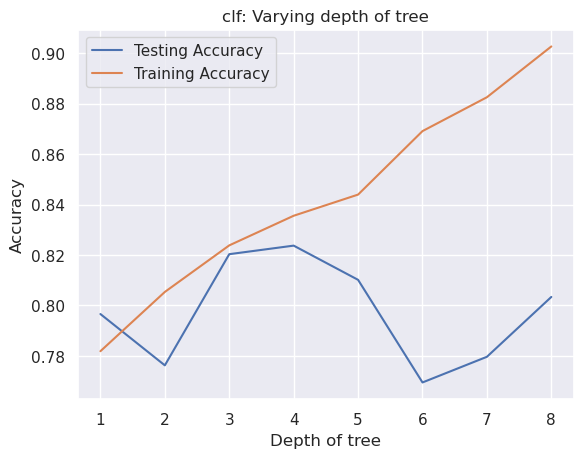

In [4]:
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()